Ejercicio de regresión logística

In [15]:
import pandas as pd 
import numpy as np 
import os      

from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing, metrics
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

In [16]:
Rlogistica = pd.read_csv('C:/Users/Familia Gómez Ortíz/Mi unidad/Pendientes U/Análisis de datos/Regresion_logistica/framingham.csv')
Rlogistica.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [17]:
Rlogistica.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [18]:
Rlogistica['BMI'].fillna(Rlogistica['BMI'].mean(), inplace=True)
Rlogistica['heartRate'].fillna(Rlogistica['heartRate'].mean(), inplace=True)
Rlogistica['glucose'].fillna(Rlogistica['glucose'].mean(), inplace=True)
Rlogistica.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                  0
heartRate            0
glucose              0
TenYearCHD           0
dtype: int64

In [19]:
Rlogistica[['BMI', 'heartRate','sysBP','diaBP','TenYearCHD']].head()

,BMI,heartRate,sysBP,diaBP,TenYearCHD
0,26.97,80.0,106.0,70.0,0
1,28.73,95.0,121.0,81.0,0
2,25.34,75.0,127.5,80.0,0
3,28.58,65.0,150.0,95.0,1
4,23.10,85.0,130.0,84.0,0


In [20]:
x_train = np.array(Rlogistica['BMI']).reshape((-1,1))
y_train = np.array(Rlogistica['TenYearCHD'])

model = LogisticRegression()
model.fit(x_train, y_train)

b = model.intercept_
w = model.coef_
print(f"interceptor b: {b}")
print(f"pendiente w: {w}")

interceptor b: [-2.97393686]
pendiente w: [[0.04810294]]


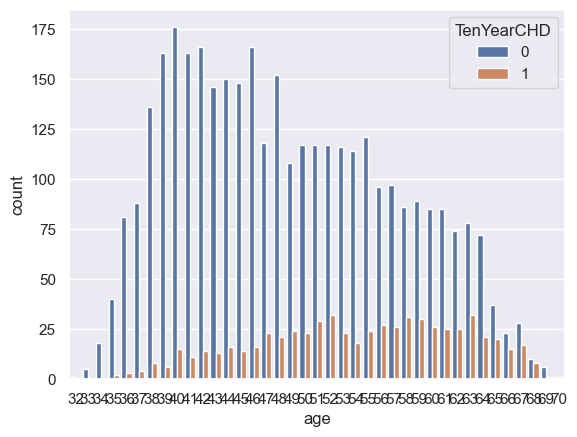

In [21]:
fig, ax = plt.subplots()
sns.countplot(x='age',hue='TenYearCHD', data=Rlogistica, ax=ax)
plt.show()

In [22]:
X = Rlogistica[["age","diabetes","sysBP","diaBP","BMI","heartRate","glucose"]]
y = Rlogistica[["TenYearCHD"]]

In [23]:
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.fit_transform(X)

X.mean()
X.std()

1.0